In [5]:
import pandas as pd 
from sklearn import svm, metrics, tree, ensemble
from sklearn.model_selection import  train_test_split 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder

In [73]:
corr_csv = pd.read_csv("t_v_2_corr.csv") 

In [74]:
corr_df = pd.DataFrame(corr_csv); corr_df.head()

,c_X,c_Y
0,30,115
1,25,110
2,114,304
3,20,70
4,120,272


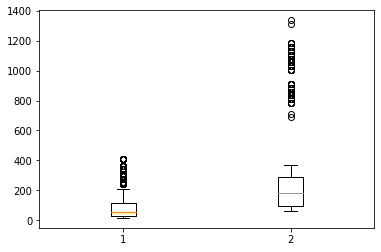

In [75]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


a = plt.boxplot(corr_df)
plt.show()

In [76]:
import numpy as np
Q1 = np.percentile(corr_df , 25) 
Q3 = np.percentile(corr_df , 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR

outlier_step

238.5

In [77]:
c_Y = (corr_df < Q1 - outlier_step) | (corr_df > Q3 + outlier_step)
c_Y = c_Y.any(axis=1)
search_df = corr_df[c_Y]
print(search_df)

     c_X   c_Y
111  245   908
112  245   908
115  245   908
116  245   908
119  245   908
..   ...   ...
541  343  1158
544  343  1132
545  344  1132
549  343  1133
550  343  1133

[134 rows x 2 columns]


In [78]:
corr_df = corr_df.drop(search_df.index, axis=0)
print(corr_df)

      c_X  c_Y
0      30  115
1      25  110
2     114  304
3      20   70
4     120  272
...   ...  ...
1730   96  288
1731  120  288
1732  120  288
1733  120  296
1734  120  296

[1601 rows x 2 columns]


In [4]:
corr_ratio = corr_df["c_Y"] / corr_df["c_X"]

In [6]:
corr_ratio_df = pd.DataFrame(corr_ratio, columns=["c_ratio"]); corr_ratio_df

,c_ratio
0,3.833333
1,4.400000
2,3.500000
3,2.266667
4,2.266667
...,...
1737,3.000000
1738,2.400000
1739,2.400000
1740,2.466667


In [79]:
c_labels = ["0" for i in range(len(corr_df))]
c_labels_df = pd.DataFrame(c_labels, columns=["c_labels"]); c_labels_df

,c_labels
0,0
1,0
2,0
3,0
4,0
...,...
1596,0
1597,0
1598,0
1599,0


In [80]:
# corr_data = corr_ratio_df.join(c_labels_df, how="right"); corr_data.head()
corr_data = corr_df.join(c_labels_df, how="right"); corr_data

,c_X,c_Y,c_labels
0,30.0,115.0,0
1,25.0,110.0,0
2,114.0,304.0,0
3,20.0,70.0,0
4,120.0,272.0,0
...,...,...,...
1596,25.0,77.0,0
1597,20.0,77.0,0
1598,120.0,272.0,0
1599,96.0,296.0,0


In [81]:
forw_csv = pd.read_csv("t_v_2_forw.csv") 

In [82]:
forw_df = pd.DataFrame(forw_csv); forw_df = forw_df.drop(forw_df.index[797])

In [83]:
forw_df.columns = ["f_X", "f_Y"]

In [84]:
forw_df[forw_df["f_X"]==0]

,f_X,f_Y


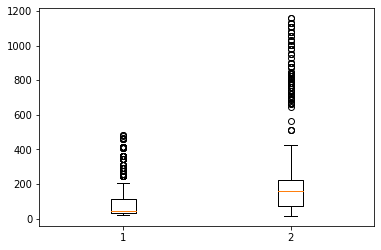

In [85]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


b = plt.boxplot(forw_df)
plt.show()

In [86]:
Q1_2 = np.percentile(forw_df , 25) 
Q3_2 = np.percentile(forw_df , 75) 
IQR_2 = Q3_2 - Q1_2 
outlier_step_2 = 1.5 * IQR_2

outlier_step_2

196.5

In [87]:
f_Y = (forw_df < Q1_2 - outlier_step_2) | (forw_df > Q3_2 + outlier_step_2)
f_Y = f_Y.any(axis=1)
searchf_df = forw_df[f_Y]
print(searchf_df)

     f_X  f_Y
173  294  785
174  245  761
178  245  809
179  294  785
180  294  809
..   ...  ...
576  142  376
578  142  384
579  143  376
580  114  408
581  142  408

[127 rows x 2 columns]


In [88]:
forw_df = forw_df.drop(searchf_df.index, axis=0)
print(forw_df)

      f_X  f_Y
0      86  216
1     114  216
2      45   90
3      35   93
4     134  255
...   ...  ...
1675  111  230
1676  112  230
1677  135  238
1678  134  238
1679   40   80

[1552 rows x 2 columns]


In [13]:
forw_ratio = forw_df["f_Y"] / forw_df["f_X"]

In [14]:
forw_ratio_df = pd.DataFrame(forw_ratio, columns=["f_ratio"]); forw_ratio_df.describe()

,f_ratio
count,1677.000000
mean,2.298496
std,0.646880
min,0.112676
25%,1.866667
50%,2.266667
75%,2.635294
max,8.000000


In [89]:
f_labels = ["1" for i in range(len(forw_df))]
f_labels_df = pd.DataFrame(f_labels, columns=["f_labels"]); f_labels_df

,f_labels
0,1
1,1
2,1
3,1
4,1
...,...
1547,1
1548,1
1549,1
1550,1


In [91]:
# forw_data = forw_ratio_df.join(f_labels_df, how="right")
forw_data = forw_df.join(f_labels_df, how="right"); forw_data

,f_X,f_Y,f_labels
0,86.0,216.0,1
1,114.0,216.0,1
2,45.0,90.0,1
3,35.0,93.0,1
4,134.0,255.0,1
...,...,...,...
1547,20.0,65.0,1
1548,25.0,72.0,1
1549,30.0,82.0,1
1550,30.0,85.0,1


In [92]:
corr_data.columns = ["x_data", "y_data", "labels"]
forw_data.columns = ["x_data", "y_data", "labels"]

In [93]:
total_data = pd.concat([corr_data, forw_data]); total_data = total_data.drop(["x_data"], axis="columns")

In [94]:
total_data.head()

,y_data,labels
0,115.0,0
1,110.0,0
2,304.0,0
3,70.0,0
4,272.0,0


In [95]:
data_shuffled = total_data.sample(frac=1)  # row 전체 shuffle

data_shuffled = total_data.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [96]:
data_shuffled = data_shuffled.dropna()

In [97]:
data_shuffled

,y_data,labels
0,208.0,1
1,77.0,0
2,72.0,0
3,63.0,1
4,72.0,0
...,...,...
3147,87.0,1
3148,224.0,0
3149,98.0,0
3151,73.0,1


In [98]:
pose_data = data_shuffled[["y_data"]]

# encoder = LabelEncoder()
# encoder.fit(data_shuffled["labels"])
# data_shuffled["labels"] = encoder.transform(data_shuffled["labels"])

pose_label = data_shuffled["labels"]

In [99]:
train_data, test_data , train_label, test_label  =  train_test_split(pose_data, pose_label, test_size=0.2)

# help( train_test_split )

In [100]:
model = svm.SVC(  )
model.fit(train_data, train_label  ) 
pre = model.predict( test_data )
ac_score = metrics.accuracy_score( test_label, pre ) 
print("SVC 정답률 = " , ac_score)

SVC 정답률 =  0.6683937823834197


In [101]:
model1 = tree.DecisionTreeClassifier()
model1.fit(train_data, train_label)
pre1 = model1.predict(test_data)
ac_score1 = metrics.accuracy_score(test_label, pre1)
print("의사결정 트리 정답률 = ", ac_score1)

의사결정 트리 정답률 =  0.7322970639032815


In [102]:
model3 = tree.ExtraTreeClassifier()
model3.fit(train_data, train_label)
pre3 = model3.predict(test_data)
ac_score3 = metrics.accuracy_score(test_label, pre3)
print("엑스트라 트리 정답률 = ", ac_score3)

엑스트라 트리 정답률 =  0.7305699481865285


In [103]:
model4 = ensemble.RandomForestClassifier()
model4.fit(train_data, train_label)
pre4 = model4.predict(test_data)
ac_score4 = metrics.accuracy_score(test_label, pre4)
print("앙상블 랜덤포레스트 정답률 = ", ac_score4)

앙상블 랜덤포레스트 정답률 =  0.7392055267702936


In [104]:
model5 = ensemble.AdaBoostClassifier()
model5.fit(train_data, train_label)
pre5 = model5.predict(test_data)
ac_score5 = metrics.accuracy_score(test_label, pre5)
print("아다부스트 정답률 = ", ac_score5)

아다부스트 정답률 =  0.7081174438687392


In [105]:
model6 = ensemble.BaggingClassifier()
model6.fit(train_data, train_label)
pre6 = model6.predict(test_data)
ac_score6 = metrics.accuracy_score(test_label, pre6)
print("배깅 정답률 = ", ac_score6)

배깅 정답률 =  0.7253886010362695


In [106]:
model7 = ensemble.GradientBoostingClassifier()
model7.fit(train_data, train_label)
pre7 = model7.predict(test_data)
ac_score7 = metrics.accuracy_score(test_label, pre7)
print("경사 부스팅 정답률 = ", ac_score7)


경사 부스팅 정답률 =  0.7357512953367875


In [107]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
model8 = ensemble.StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
model8.fit(train_data, train_label)
pre8 = model8.predict(test_data)
ac_score8 = metrics.accuracy_score(test_label, pre8)
print("스태킹 정답률 = ", ac_score8)

스태킹 정답률 =  0.7236614853195165


In [108]:
model9 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="hard")
model9.fit(train_data, train_label)
pre9 = model9.predict(test_data)
ac_score9 = metrics.accuracy_score(test_label, pre9)
print("보팅 하드 정답률 = ", ac_score9)

보팅 하드 정답률 =  0.49222797927461137


In [109]:
model9_1 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="soft")
model9_1.fit(train_data, train_label)
pre9_1 = model9_1.predict(test_data)
ac_score9_1 = metrics.accuracy_score(test_label, pre9_1)
print("보팅 소프트 정답률 = ", ac_score9_1)

보팅 소프트 정답률 =  0.7167530224525043


In [110]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
model10 = ensemble.HistGradientBoostingClassifier()
model10.fit(train_data, train_label)
pre10 = model10.predict(test_data)
ac_score10 = metrics.accuracy_score(test_label, pre10)
print("히스트그래디언트부스팅 정답률 = ", ac_score10)

히스트그래디언트부스팅 정답률 =  0.7357512953367875


In [111]:
from sklearn.dummy import DummyClassifier
model11 = DummyClassifier(strategy="most_frequent")
model11.fit(train_data, train_label)
pre11 = model11.predict(test_data)
ac_score11 = metrics.accuracy_score(test_label, pre11)
print("더미 정답률 = ", ac_score11)

더미 정답률 =  0.5250431778929189


In [112]:
corr_test_csv = pd.read_csv('test2_corr.csv')

In [113]:
corr_test_df = pd.DataFrame(corr_test_csv)

In [114]:
corr_test_label = ["0" for i in range(len(corr_test_df))]
corr_test_label = pd.DataFrame(corr_test_label, columns=["labels"])

In [115]:
corr_test_data = corr_test_df.join(corr_test_label, how="right"); corr_test_data = corr_test_data.drop(["c_X"], axis='columns')

In [117]:
corr_test_data.columns = ["y_data", "labels"]
corr_test_data

,y_data,labels
0,280,0
1,280,0
2,248,0
3,248,0
4,184,0
...,...,...
117,85,0
118,75,0
119,75,0
120,122,0


In [118]:
# from sklearn.preprocessing import LabelEncoder
# # LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(corr_test_data["labels"])
# corr_test_data["labels"] = encoder.transform(corr_test_data["labels"])
a = corr_test_data.values[: ,:1]

In [119]:
corr_pre = model.predict( a)

In [120]:
corr_score = metrics.accuracy_score( test_label[:122], corr_pre ) 
print("정답률 = " , corr_score)

정답률 =  0.45081967213114754


In [121]:
test_forw_csv = pd.read_csv('test2_forw.csv')

In [122]:
test_forw_df = pd.DataFrame(test_forw_csv)

In [123]:
test_forw_label = ["1" for i in range(len(test_forw_df))]
test_forw_label = pd.DataFrame(test_forw_label, columns=["labels"])

In [124]:
test_forw_data = test_forw_df.join(test_forw_label, how="right"); test_forw_data = test_forw_data.drop(["c_X"], axis='columns')

In [125]:
test_forw_data.columns = ["y_data", "labels"]
test_forw_data

,y_data,labels
0,280,1
1,280,1
2,248,1
3,248,1
4,184,1
...,...,...
117,85,1
118,75,1
119,75,1
120,122,1


In [126]:

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(test_forw_data["labels"])
# test_forw_data["labels"] = encoder.transform(test_forw_data["labels"])
b = test_forw_data.values[: ,:1]

In [127]:
forw_pre = model.predict(b)

In [128]:
forw_score = metrics.accuracy_score( test_label[:122], forw_pre ) 
print("정답률 = " , forw_score)

정답률 =  0.45081967213114754


In [129]:
total_test = pd.concat([corr_test_data,test_forw_data]); total_test

,y_data,labels
0,280,0
1,280,0
2,248,0
3,248,0
4,184,0
...,...,...
117,85,1
118,75,1
119,75,1
120,122,1


In [130]:
total_shuffled = total_test.sample(frac=1)  # row 전체 shuffle

total_shuffled = total_test.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [131]:
total_shuffled.dropna()

,y_data,labels
0,144,1
1,168,0
2,216,1
3,128,0
4,138,1
...,...,...
239,256,1
240,232,0
241,184,1
242,106,1


In [132]:
# encoder = LabelEncoder()
# encoder.fit(total_shuffled["labels"])
# total_shuffled["labels"] = encoder.transform(total_shuffled["labels"])
c = total_shuffled.values[: ,:1]

In [133]:
total_pre = model.predict(c)

In [134]:
total_score = metrics.accuracy_score( test_label[:244], total_pre ) 
print("정답률 = " , total_score)

정답률 =  0.5368852459016393


In [135]:
total_pre1 = model10.predict(c)
total_score1 = metrics.accuracy_score(test_label[:244], total_pre1)
print("히스트그래디언트부스팅 정답률 = ", total_score1)

히스트그래디언트부스팅 정답률 =  0.5368852459016393


In [136]:
total_pre2 = model9.predict(c)
total_score2 = metrics.accuracy_score(test_label[:244], total_pre2)
print("보팅 하드 정답률 = ", total_score2)

보팅 하드 정답률 =  0.4713114754098361


In [137]:
total_pre3 = model4.predict(c)
total_score3 = metrics.accuracy_score(test_label[:244], total_pre3)
print("앙상블 랜덤포레스트 정답률 = ", total_score3)

앙상블 랜덤포레스트 정답률 =  0.5286885245901639
